<a href="https://colab.research.google.com/github/SHAIKYASIR/Personal-Expenses/blob/main/Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/FML/FUNDS.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


,Txn Date,Value Date,Description,Ref No./Cheque No.,Debit,Credit,Balance
0,01-Jul-24,01-Jul-24,TO TRANSFER-UPI/DR/454931218351/RAM LAL/YES...,TRANSFER TO 4897690162095,20,,"12,378.72"
1,01-Jul-24,01-Jul-24,TO TRANSFER-UPI/DR/454933511387/Mr PATH/FD...,TRANSFER TO 4897690162095,100,,"12,278.72"
2,01-Jul-24,01-Jul-24,TO TRANSFER-UPI/DR/454933553209/Mr PATH/FD...,TRANSFER TO 4897690162095,20,,"12,258.72"
3,01-Jul-24,01-Jul-24,TO TRANSFER-UPI/DR/454944574748/EJJIROTH/YE...,TRANSFER TO 4897690162095,30,,"12,228.72"
4,01-Jul-24,01-Jul-24,TO TRANSFER-UPI/DR/454945418253/DAYARAM S/Y...,TRANSFER TO 4897690162095,120,,"12,108.72"


In [9]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/FML/FUNDS.csv'
df = pd.read_csv(file_path)

# Inspect the column names
print(df.columns)

# Strip any extra whitespace from column names
df.columns = df.columns.str.strip()

# Inspect the cleaned column names
print(df.columns)

# Drop rows where 'Txn Date' or 'Value Date' is NaN or contain non-date values
df = df.dropna(subset=['Txn Date', 'Value Date'])
df = df[df['Txn Date'].str.match(r'^\d{2}-\w{3}-\d{2}$')]
df = df[df['Value Date'].str.match(r'^\d{2}-\w{3}-\d{2}$')]

# Convert date columns to datetime format
df['Txn Date'] = pd.to_datetime(df['Txn Date'], format='%d-%b-%y')
df['Value Date'] = pd.to_datetime(df['Value Date'], format='%d-%b-%y')

# Remove commas from 'Debit', 'Credit', and 'Balance' columns and convert to numeric
df['Debit'] = pd.to_numeric(df['Debit'].str.replace(',', ''), errors='coerce')
df['Credit'] = pd.to_numeric(df['Credit'].str.replace(',', ''), errors='coerce')
df['Balance'] = pd.to_numeric(df['Balance'].str.replace(',', ''), errors='coerce')

# Fill missing values if any
df.fillna(0, inplace=True)

# Display the first few rows of the preprocessed dataframe
print(df.head())




Index(['Txn Date', 'Value Date', 'Description', 'Ref No./Cheque No.',
       '        Debit', 'Credit', 'Balance'],
      dtype='object')
Index(['Txn Date', 'Value Date', 'Description', 'Ref No./Cheque No.', 'Debit',
       'Credit', 'Balance'],
      dtype='object')
    Txn Date Value Date                                        Description  \
0 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454931218351/RAM LAL/YES...   
1 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454933511387/Mr  PATH/FD...   
2 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454933553209/Mr  PATH/FD...   
3 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454944574748/EJJIROTH/YE...   
4 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454945418253/DAYARAM S/Y...   

          Ref No./Cheque No.  Debit  Credit   Balance  
0  TRANSFER TO 4897690162095   20.0     0.0  12378.72  
1  TRANSFER TO 4897690162095  100.0     0.0  12278.72  
2  TRANSFER TO 4897690162095   20.0     0.0  12258.72  
3  TRANSFER TO 4897690162095   30.0    

In [10]:
# Feature Engineering
df['Day'] = df['Txn Date'].dt.day
df['Month'] = df['Txn Date'].dt.month
df['Year'] = df['Txn Date'].dt.year
df['DayOfWeek'] = df['Txn Date'].dt.dayofweek

# Determine if the transaction is a debit or credit
df['Amount'] = df['Debit'] - df['Credit']
df['TransactionType'] = df['Amount'].apply(lambda x: 'Debit' if x < 0 else 'Credit')

# Encode the TransactionType as binary
df['TransactionType'] = df['TransactionType'].map({'Debit': 1, 'Credit': 0})

# Display the first few rows of the feature-engineered dataframe
print(df.head())


    Txn Date Value Date                                        Description  \
0 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454931218351/RAM LAL/YES...   
1 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454933511387/Mr  PATH/FD...   
2 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454933553209/Mr  PATH/FD...   
3 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454944574748/EJJIROTH/YE...   
4 2024-07-01 2024-07-01     TO TRANSFER-UPI/DR/454945418253/DAYARAM S/Y...   

          Ref No./Cheque No.  Debit  Credit   Balance  Day  Month  Year  \
0  TRANSFER TO 4897690162095   20.0     0.0  12378.72    1      7  2024   
1  TRANSFER TO 4897690162095  100.0     0.0  12278.72    1      7  2024   
2  TRANSFER TO 4897690162095   20.0     0.0  12258.72    1      7  2024   
3  TRANSFER TO 4897690162095   30.0     0.0  12228.72    1      7  2024   
4  TRANSFER TO 4897690162095  120.0     0.0  12108.72    1      7  2024   

   DayOfWeek  Amount  TransactionType  
0          0    20.0                0  


In [11]:
from sklearn.model_selection import train_test_split

# Define features and target
features = ['Day', 'Month', 'Year', 'DayOfWeek', 'Amount']
target = 'TransactionType'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(71, 5) (18, 5) (71,) (18,)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         3

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy Score: {accuracy}')


Confusion Matrix:
[[15  0]
 [ 0  3]]
Accuracy Score: 1.0


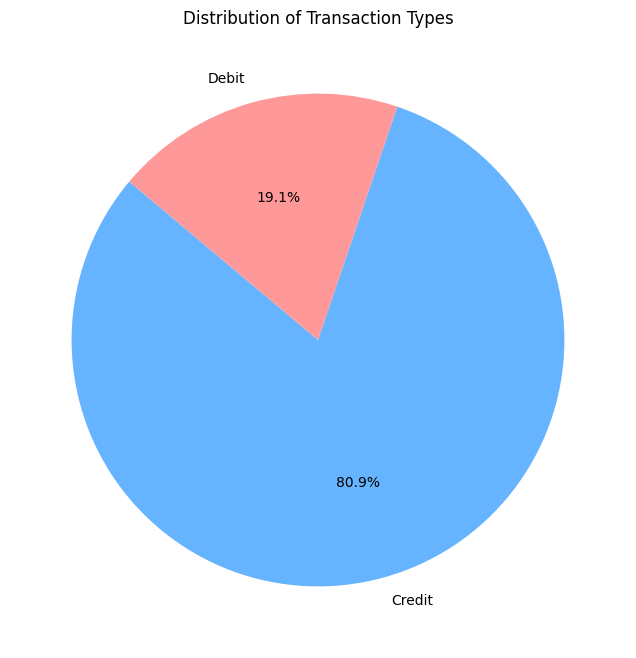

In [14]:
import matplotlib.pyplot as plt

# Count the occurrences of each transaction type
transaction_type_counts = df['TransactionType'].value_counts()

# Map transaction types back to their labels
transaction_type_counts.index = ['Credit' if x == 0 else 'Debit' for x in transaction_type_counts.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(transaction_type_counts, labels=transaction_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Transaction Types')
plt.show()


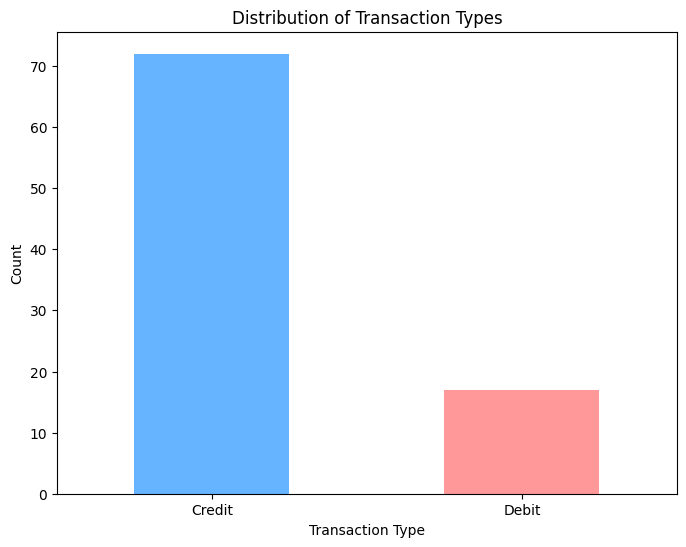

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the DataFrame `df` has already been preprocessed as described earlier

# Count the occurrences of each transaction type
transaction_type_counts = df['TransactionType'].value_counts()

# Map transaction types back to their labels
transaction_type_counts.index = ['Credit' if x == 0 else 'Debit' for x in transaction_type_counts.index]

# Plot the bar graph
plt.figure(figsize=(8, 6))
transaction_type_counts.plot(kind='bar', color=['#66b3ff', '#ff9999'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.xticks(rotation=0)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample descriptions for illustration purposes
sample_descriptions = [
    "Grocery Store Purchase",
    "Electricity Bill Payment",
    "Monthly Rent",
    "Salary Credit",
    "Online Shopping"
]

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(sample_descriptions)

# Display the TF-IDF matrix
print(X.toarray())


In [19]:
# Create a 'Day' column to categorize transactions by day
df['Day'] = df['Txn Date'].dt.date

# Display the first few rows with the new 'Day' column
print(df[['Txn Date', 'Day']].head(10))



    Txn Date         Day
0 2024-07-01  2024-07-01
1 2024-07-01  2024-07-01
2 2024-07-01  2024-07-01
3 2024-07-01  2024-07-01
4 2024-07-01  2024-07-01
5 2024-07-01  2024-07-01
6 2024-07-03  2024-07-03
7 2024-07-03  2024-07-03
8 2024-07-03  2024-07-03
9 2024-07-03  2024-07-03


In [20]:
# Define categories based on description patterns
categories = {
    'Grocery': ['grocery', 'supermarket'],
    'Utilities': ['bill', 'electricity', 'water'],
    'Rent': ['rent'],
    'Salary': ['salary', 'credit'],
    'Shopping': ['shopping', 'online']
}

# Function to categorize transactions
def categorize_transaction(description):
    for category, keywords in categories.items():
        if any(keyword in description.lower() for keyword in keywords):
            return category
    return 'Other'

# Apply the categorization function
df['Category'] = df['Description'].apply(categorize_transaction)

# Display the first few rows with categories
print(df[['Description', 'Category']].head())


                                         Description Category
0     TO TRANSFER-UPI/DR/454931218351/RAM LAL/YES...    Other
1     TO TRANSFER-UPI/DR/454933511387/Mr  PATH/FD...    Other
2     TO TRANSFER-UPI/DR/454933553209/Mr  PATH/FD...    Other
3     TO TRANSFER-UPI/DR/454944574748/EJJIROTH/YE...    Other
4     TO TRANSFER-UPI/DR/454945418253/DAYARAM S/Y...    Other


In [28]:
# Group by day and category, then count the number of transactions
daily_category_counts = df.groupby(['Day', 'Category']).size().unstack(fill_value=0)

# Display the first few rows of the daily category counts
print(daily_category_counts.head(30))


Category    Other
Day              
2024-07-01      6
2024-07-03      5
2024-07-04      9
2024-07-05      1
2024-07-07      4
2024-07-08      3
2024-07-09      5
2024-07-10      2
2024-07-11      8
2024-07-12      2
2024-07-13      7
2024-07-14      8
2024-07-15      8
2024-07-16      4
2024-07-17      8
2024-07-18      1
2024-07-19      3
2024-07-20      1
2024-07-22      3
2024-07-24      1


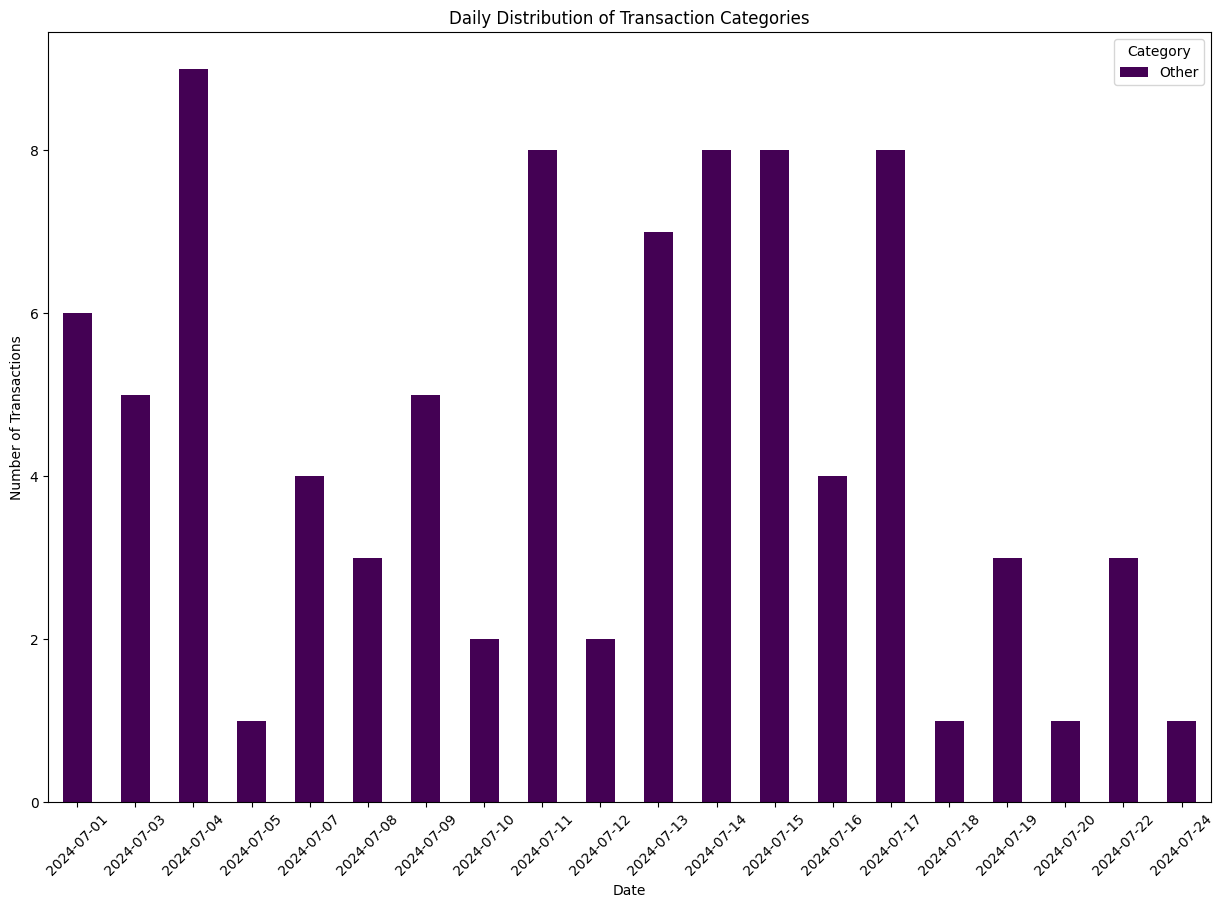

In [22]:
import matplotlib.pyplot as plt

# Plot the bar graph for each day
daily_category_counts.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Distribution of Transaction Categories')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.show()
